In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [16]:
tit = sns.load_dataset('titanic')
tit.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [6]:
tit.shape

(891, 15)

In [7]:
tit.isnull().head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


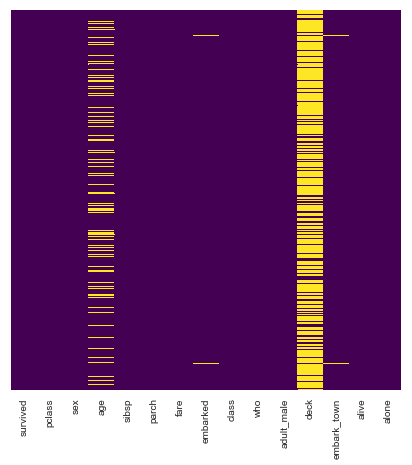

In [17]:
plt.figure(figsize = (7,7))
sns.heatmap(tit.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

In [21]:
tit.drop(['sibsp','parch','embarked','who','deck','alive','alone'],axis = 1,inplace = True)

In [22]:
tit.head()

,survived,pclass,sex,age,fare,class,adult_male,embark_town
0,0,3,male,22.0,7.2500,Third,True,Southampton
1,1,1,female,38.0,71.2833,First,False,Cherbourg
2,1,3,female,26.0,7.9250,Third,False,Southampton
3,1,1,female,35.0,53.1000,First,False,Southampton
4,0,3,male,35.0,8.0500,Third,True,Southampton


In [23]:
tit.dropna(inplace = True)

In [26]:
tit.fillna(tit.mean()).head()

,survived,pclass,sex,age,fare,class,adult_male,embark_town
0,0,3,male,22.0,7.2500,Third,True,Southampton
1,1,1,female,38.0,71.2833,First,False,Cherbourg
2,1,3,female,26.0,7.9250,Third,False,Southampton
3,1,1,female,35.0,53.1000,First,False,Southampton
4,0,3,male,35.0,8.0500,Third,True,Southampton


In [25]:
tit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 8 columns):
survived       712 non-null int64
pclass         712 non-null int64
sex            712 non-null object
age            712 non-null float64
fare           712 non-null float64
class          712 non-null category
adult_male     712 non-null bool
embark_town    712 non-null object
dtypes: bool(1), category(1), float64(2), int64(2), object(2)
memory usage: 40.4+ KB


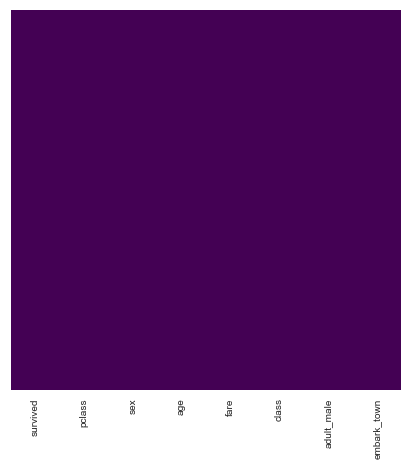

In [27]:
plt.figure(figsize = (7,7))
sns.heatmap(tit.isnull(), yticklabels = False,cbar = False,cmap = 'viridis') #our data is clean now

In [29]:
tit.dropna(inplace = True)

In [31]:
sex = pd.get_dummies(tit['sex'],drop_first = True)

In [35]:
embark = pd.get_dummies(tit['embark_town'],drop_first = True)

In [36]:
embark.head()

,Queenstown,Southampton
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [37]:
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [38]:
tit = pd.concat([tit,sex,embark],axis = 1)

In [39]:
tit.head()

,survived,pclass,sex,age,fare,class,adult_male,embark_town,male,Queenstown,Southampton
0,0,3,male,22.0,7.2500,Third,True,Southampton,1,0,1
1,1,1,female,38.0,71.2833,First,False,Cherbourg,0,0,0
2,1,3,female,26.0,7.9250,Third,False,Southampton,0,0,1
3,1,1,female,35.0,53.1000,First,False,Southampton,0,0,1
4,0,3,male,35.0,8.0500,Third,True,Southampton,1,0,1


In [40]:
clas = pd.get_dummies(tit['class'],drop_first=True)

In [41]:
clas.head(2)

,Second,Third
0,0,1
1,0,0


In [42]:
tit.drop(['sex','embark_town','class','adult_male'],axis = 1,inplace = True)

In [43]:
tit.head()

,survived,pclass,age,fare,male,Queenstown,Southampton
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1


In [44]:
tit = pd.concat([tit,clas],axis = 1)

In [45]:
tit.head()

,survived,pclass,age,fare,male,Queenstown,Southampton,Second,Third
0,0,3,22.0,7.2500,1,0,1,0,1
1,1,1,38.0,71.2833,0,0,0,0,0
2,1,3,26.0,7.9250,0,0,1,0,1
3,1,1,35.0,53.1000,0,0,1,0,0
4,0,3,35.0,8.0500,1,0,1,0,1


In [47]:
X = tit.drop(['survived'],axis = 1)
y = tit['survived']

In [49]:
X.shape

(712, 8)

In [50]:
y.shape

(712,)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel =  LogisticRegression()

In [55]:
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [56]:
predictions = logmodel.predict(X_test)

In [57]:
from sklearn.metrics import classification_report

In [58]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.82      0.81       128
           1       0.73      0.71      0.72        86

   micro avg       0.78      0.78      0.78       214
   macro avg       0.77      0.76      0.77       214
weighted avg       0.77      0.78      0.78       214



In [59]:
from sklearn.metrics import confusion_matrix

In [60]:
confusion_matrix(y_test,predictions)

array([[105,  23],
       [ 25,  61]], dtype=int64)

In [62]:
from sklearn.linear_model import LinearRegression


In [63]:
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [64]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [65]:
lm.intercept_

1.3600728005633027

In [66]:
lm.coef_

array([-1.71975995e-01, -5.61819812e-03, -7.78640790e-06, -4.99006719e-01,
       -8.27929581e-02, -4.08156343e-02, -5.11483640e-02, -6.04138155e-02])

In [67]:
predictions = lm.predict(X_test)

In [69]:
predictions.shape

(214,)

In [70]:
y_test.head()

225    0
449    1
750    1
261    1
283    1
Name: survived, dtype: int64

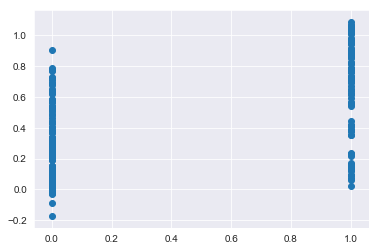

In [71]:
plt.scatter(y_test,predictions)

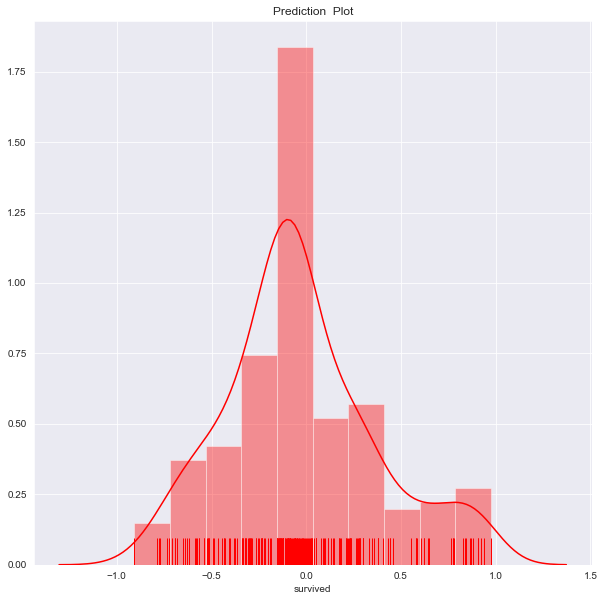

In [93]:
plt.figure(figsize=(10,10))
plt.title('Prediction  Plot')
sns.distplot(y_test-predictions,rug = True,color = 'r',bins = 10,label = 'Prediction plot')

In [73]:
from sklearn import metrics

In [74]:
metrics.mean_absolute_error(y_test,predictions)

0.306861058509328

In [75]:
metrics.mean_squared_error(y_test,predictions)

0.1575593527018998

In [76]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

0.3969374669918422

In [77]:
import numpy as np
import pandas as pd
prediction = pd.DataFrame(predictions, columns=['predictions']).to_csv('prediction.csv')